### Parts of Speech Tagging using Tf LSTM

In [1]:
import nltk
from nltk.corpus import brown

In [2]:
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
corpus = brown.tagged_sents(tagset='universal')
corpus

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [4]:
len(corpus)

57340

In [5]:
inputs = []
outputs = []

for sentence in corpus:
  inputSent = []
  sentTags = []

  for token in sentence:
    inputSent.append(token[0])
    sentTags.append(token[1])

  inputs.append(inputSent)
  outputs.append(sentTags)

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, Bidirectional
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    outputs,
    test_size=0.3,
)

In [8]:
MAX_VOCAB_SIZE = None

should_lowercase = False
word_tokenizer = Tokenizer(
    num_words=MAX_VOCAB_SIZE,
    lower=should_lowercase,
    oov_token='UNK',
)
# otherwise unknown tokens will be removed and len(input) != len(target)
# & input words and target words will not be aligned

word_tokenizer.fit_on_texts(x_train)
x_train_int = word_tokenizer.texts_to_sequences(x_train)
x_test_int = word_tokenizer.texts_to_sequences(x_test)

In [9]:
word2idx = word_tokenizer.word_index
V = len(word2idx)
print(f'Found {V} unique words')
word2idx

Found 47549 unique words


{'UNK': 1,
 'the': 2,
 ',': 3,
 '.': 4,
 'of': 5,
 'and': 6,
 'to': 7,
 'a': 8,
 'in': 9,
 'that': 10,
 'is': 11,
 'was': 12,
 '``': 13,
 "''": 14,
 'for': 15,
 'The': 16,
 'with': 17,
 'as': 18,
 'it': 19,
 'he': 20,
 'his': 21,
 'on': 22,
 'be': 23,
 ';': 24,
 'by': 25,
 'I': 26,
 'had': 27,
 'at': 28,
 '?': 29,
 'not': 30,
 'are': 31,
 'from': 32,
 'or': 33,
 'this': 34,
 'have': 35,
 'an': 36,
 'which': 37,
 '--': 38,
 'were': 39,
 'but': 40,
 'He': 41,
 'one': 42,
 'her': 43,
 'they': 44,
 'you': 45,
 'all': 46,
 'would': 47,
 'him': 48,
 'been': 49,
 ')': 50,
 'their': 51,
 '(': 52,
 'has': 53,
 'will': 54,
 'who': 55,
 'more': 56,
 'out': 57,
 'she': 58,
 'we': 59,
 'It': 60,
 'said': 61,
 'up': 62,
 'there': 63,
 ':': 64,
 'no': 65,
 'In': 66,
 'about': 67,
 'than': 68,
 'them': 69,
 'its': 70,
 'into': 71,
 'so': 72,
 'when': 73,
 'can': 74,
 'could': 75,
 'only': 76,
 'other': 77,
 '!': 78,
 'time': 79,
 'what': 80,
 'if': 81,
 'some': 82,
 'But': 83,
 'any': 84,
 'may': 85,


In [10]:
def flatten(list_of_lists):
  flattened = [val for sublist in list_of_lists for val in sublist]
  return flattened

all_targets_train = {x for l in y_train for x in l}
all_targets_test = {x for l in y_test for x in l}

In [11]:
all_targets_train

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [12]:
all_targets_test

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [13]:
all_targets_train == all_targets_test

True

In [14]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(y_train)
y_train_int = tag_tokenizer.texts_to_sequences(y_train)
y_test_int = tag_tokenizer.texts_to_sequences(y_test)

y_train_int_unpadded = y_train_int
y_test_int_unpadded = y_test_int

In [15]:
maxlen_train = max(len(sent) for sent in x_train)
maxlen_test = max(len(sent) for sent in x_test)

T = max((maxlen_train, maxlen_test))

In [16]:
x_train_int = pad_sequences(x_train_int, maxlen=T)
print('Shape of data train tensor:', x_train_int.shape)

x_test_int = pad_sequences(x_test_int, maxlen=T)
print('Shape of data test tensor:', x_test_int.shape)

y_train_int = pad_sequences(y_train_int, maxlen=T)
print('Shape of train output tensor:', y_train_int.shape)

y_test_int = pad_sequences(y_test_int, maxlen=T)
print('Shape of test output tensor:', y_test_int.shape)

Shape of data train tensor: (40138, 180)
Shape of data test tensor: (17202, 180)
Shape of train output tensor: (40138, 180)
Shape of test output tensor: (17202, 180)


In [17]:
K = len(all_targets_train) + 1
K

13

In [18]:
D = 32

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180)]             0         
                                                                 
 embedding (Embedding)       (None, 180, 32)           1521600   
                                                                 
 bidirectional (Bidirectiona  (None, 180, 64)          16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 180, 13)           845       
                                                                 
Total params: 1,539,085
Trainable params: 1,539,085
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
r = model.fit(x_train_int, y_train_int, epochs = 5, validation_data= (x_test_int, y_test_int), verbose=True)

Epoch 1/5
1255/1255 [==============================] - 122s 94ms/step - loss: 0.1841 - accuracy: 0.9519 - val_loss: 0.0278 - val_accuracy: 0.9926
Epoch 2/5
1255/1255 [==============================] - 116s 92ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.0129 - val_accuracy: 0.9961
Epoch 3/5
1255/1255 [==============================] - 116s 92ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0107 - val_accuracy: 0.9966
Epoch 4/5
1255/1255 [==============================] - 115s 92ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0100 - val_accuracy: 0.9968
Epoch 5/5
1255/1255 [==============================] - 117s 93ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0099 - val_accuracy: 0.9970


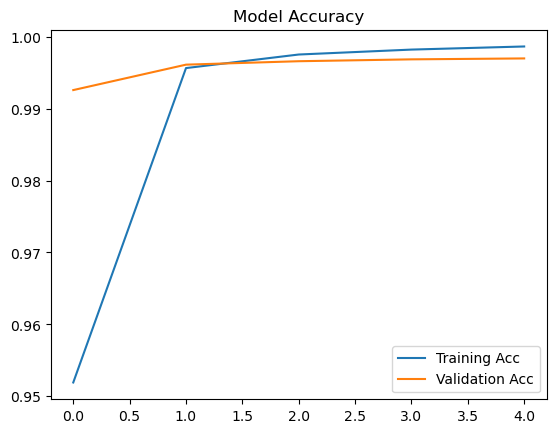

In [20]:
plt.plot(r.history['accuracy'],label='Training Acc')
plt.plot(r.history['val_accuracy'],label='Validation Acc')
plt.title('Model Accuracy')
plt.legend()

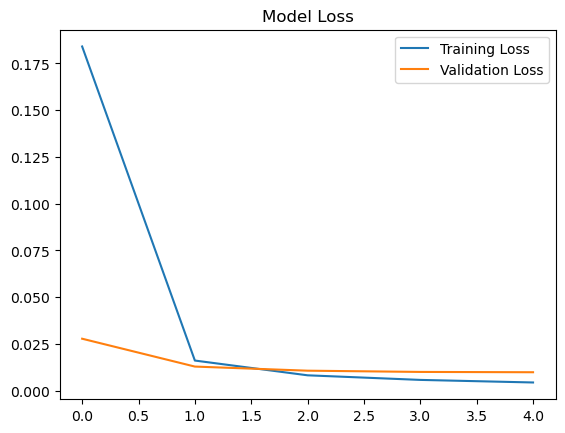

In [21]:
plt.plot(r.history['loss'],label='Training Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.legend()

## True model accuracy - above includes padding

In [22]:
train_lengths = []
for sentence in x_train:
  train_lengths.append(len(sentence))

test_lengths = []
for sentence in x_test:
  test_lengths.append(len(sentence))

In [23]:
train_probs = model.predict(x_train_int) # N x T x K
train_predictions = []
for probs, length in zip(train_probs, train_lengths):
  # probs is T x K
  probs_ = probs[-length:]
  preds = np.argmax(probs_, axis=1)
  train_predictions.append(preds)

# flatten
flat_train_predictions = flatten(train_predictions)
flat_train_targets = flatten(y_train_int_unpadded)

1255/1255 [==============================] - 25s 20ms/step


In [24]:
test_probs = model.predict(x_test_int) # N x T x K
test_predictions = []
for probs, length in zip(test_probs, test_lengths):
  # probs is T x K
  probs_ = probs[-length:]
  preds = np.argmax(probs_, axis=1)
  test_predictions.append(preds)

# flatten
flat_test_predictions = flatten(test_predictions)
flat_test_targets = flatten(y_test_int_unpadded)

538/538 [==============================] - 11s 20ms/step


In [25]:
from sklearn.metrics import accuracy_score, f1_score

print("Train acc:", accuracy_score(flat_train_targets, flat_train_predictions))
print("Test acc:", accuracy_score(flat_test_targets, flat_test_predictions))

print("Train f1:",
      f1_score(flat_train_targets, flat_train_predictions, average='macro'))
print("Test f1:",
      f1_score(flat_test_targets, flat_test_predictions, average='macro'))

Train acc: 0.9908719741214874
Test acc: 0.9730221209400824
Train f1: 0.9028645709774673
Test f1: 0.8494359043167059


# Sample Testing

In [26]:
texts = [
    "hey! i'm vismay, a data science beginner",
    "I like eating sundaes on sunday",
    "the world of AI is wonderful"
]

texts_as_ints = word_tokenizer.texts_to_sequences(texts)
texts_as_ints = pad_sequences(texts_as_ints, maxlen=T)

probs = model.predict(np.asarray(texts_as_ints))
outputs = []

for i in range(len(texts_as_ints)):
    sentOutput = []
    for j, prob in enumerate(probs[i]):
        tag = tag_tokenizer.index_word.get(np.argmax(prob), 'UNK')
        id = texts_as_ints[i][j]
        if id != 0:
            sentOutput.append(( word_tokenizer.index_word[id], tag))
    outputs.append(sentOutput)

for output in outputs:
    print(output)

1/1 [==============================] - 0s 29ms/step
[('hey', 'prt'), ('UNK', 'verb'), ('UNK', 'noun'), ('a', 'det'), ('data', 'noun'), ('science', 'noun'), ('beginner', 'noun')]
[('I', 'pron'), ('like', 'verb'), ('eating', 'verb'), ('UNK', 'noun'), ('on', 'adp'), ('UNK', 'noun')]
[('the', 'det'), ('world', 'noun'), ('of', 'adp'), ('UNK', 'noun'), ('is', 'verb'), ('wonderful', 'adj')]


In [27]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/ner_train.pkl
!wget -nc https://lazyprogrammer.me/course_files/nlp/ner_test.pkl

import pickle
    
with open('ner_train.pkl', 'rb') as f:
  corpus_train = pickle.load(f)

with open('ner_test.pkl', 'rb') as f:
  corpus_test = pickle.load(f)

train_inputs = []
train_targets = []

for sentence_tag_pairs in corpus_train:
  tokens = []
  target = []
  for token, tag in sentence_tag_pairs:
    tokens.append(token)
    target.append(tag)
  train_inputs.append(tokens)
  train_targets.append(target)

--2023-06-16 09:41:46--  https://lazyprogrammer.me/course_files/nlp/ner_train.pkl
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-06-16 09:41:46 ERROR 403: Forbidden.

--2023-06-16 09:41:46--  https://lazyprogrammer.me/course_files/nlp/ner_test.pkl
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-06-16 09:41:47 ERROR 403: Forbidden.



FileNotFoundError: [Errno 2] No such file or directory: 'ner_train.pkl'

In [ ]:
corpus_train